<a href="https://colab.research.google.com/github/ambo2020/Anna-Borowska/blob/master/BOROWSKA__Final_Assignement_20220205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Assignement: Borowska Anna Maria 

3. In this assignment, i expect you can freely choose a dataset of interest (text, numbers, mixed data, etc.) 
and process it using the packages as seen in class. The idea is to make explicit the research questions and 
produce analysis and visualizations, using the Jupyter Notebook.


4. This is the last and fourth assignment. I expect you can enhance the analysis started in the third assignment, 
using the tools and techniques we have learned since.


# Project Title: Vienna Building Heritage Interactive Map
## Research/Business questions:
Creating a interactive map for the existing csv file of the Heritage preservation office. Showing the list of addresses in a map.
Another way would have been to create a dynamic connection between the existing 'Wien Kulturgut' map andthe excel inventory of the Heritage preservation Office (BDA), but because of the the two different sources:  exoisting map and a csv file, it was at the moment too difficult to realise it.

## Data Description:
Connecting the data to the json file/map with the csv file on the Hompeage of the Heritage preservation office.
[Vienna Map](https://www.data.gv.at/)
[BDA](https://bda.gv.at/denkmalverzeichnis/#wien)  

## Data Processing Pipeline (Methodology):

1. Scrapping Data (EXCEL) from [BDA](https://bda.gv.at/denkmalverzeichnis/#wien) or downlading the csv file and then upload it in JupyterLab.
2. Cleaning the Data in python.
3. Transforming the adresses in the dataframe into a list and then connect them to the geolocator (latitude and longitude).  
4. Categorize Data: Types of Buildings and monuments should be later visible in the map (colours of the pins).
5. To visualize Data, using f.ex. plotly or folium (https://plotly.com/python/maps/; https://python-visualization.github.io/folium/)
or connect the pins with [Stadt Wien Map](https://www.data.gv.at/katalog/dataset/stadt-wien_bezirksgrenzenwien/resource/f1540ea4-edd4-42f5-9b39-2cbba97fea36).



##### Useful Links:

https://www.markdownguide.org/basic-syntax/  

https://www.openstreetmap.org/#map=7/47.714/13.349  

https://www.wien.gv.at/viennagis/datendownload.html  

https://www.data.gv.at/katalog/dataset/2ee6b8bf-6292-413c-bb8b-bd22dbb2ad4b  

## Importing Data

Before starting to use geopandas, it was important to install in the upyterLab Terminal:
conda create -n geo_env
conda activate geo_env
conda config --env --add channels conda-forge
conda config --env --set channel_priority strict
conda install python=3 geopandas

So I could recall the function: pip install geopandas

then it was possible to import geopandas as gpd


In [1]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 7.0 MB/s 
     |████████████████████████████████| 15.4 MB 38.6 MB/s 
     |████████████████████████████████| 6.3 MB 38.4 MB/s 


In [2]:
pip install geoplot

     |████████████████████████████████| 10.8 MB 16.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 27.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 25.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 13.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 44 kB 3.5 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516296 sha256=a5736691def0918a5e8f91020e1f91a0d878a17b75520080437716d8b5534703
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e1

In [3]:
import re
import sys
import os
import zipfile
import requests
import json
import time
import codecs
from datetime import datetime
from datetime import timedelta
from itertools import chain
from itertools import cycle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm


import urllib
from urllib.request import urlopen
import webbrowser
from bs4 import BeautifulSoup
import seaborn as sns

import geopandas as gpd
from geopandas.tools import geocode
from shapely.geometry import LineString, MultiPolygon

import ipywidgets as widgets


from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline

### Scraping images

In [4]:
from IPython.display import display, Image
Image(url="https://image.posterlounge.ch/img/products/690000/684926/684926_poster_l.jpg")

In [5]:
Image(url="https://images.cdn1.stockunlimited.net/preview1300/landmarks-on-austria-map_1963303.jpg")

### Scraping table from Homepage
Trying to scrape table from https://bda.gv.at/denkmalverzeichnis/

In [11]:
url1="https://bda.gv.at/denkmalverzeichnis/#wien"
list_df_tables = pd.read_html(url1)
len(list_df_tables)

1

In [12]:
list_df_tables[0].head(10)


,0,1
0,Burgenland,2.118 Objekte
1,Kärnten,2.986 Objekte
2,Niederösterreich,10.667 Objekte
3,Oberösterreich,5.936 Objekte
4,Salzburg,2.202 Objekte
5,Steiermark,4.996 Objekte
6,Tirol,4.881 Objekte
7,Vorarlberg,1.650 Objekte
8,Wien,3.367 Objekte
9,GESAMT,38.803 Objekte


### Creating Dataframe 

#### Scraping/ Uploading EXCEL
scraping csv.file from Homepage https://bda.gv.at/denkmalverzeichnis/#wien

Problem: It is possible to scrap tabele, but it doesn't find the file on the Homepage https://bda.gv.at/denkmalverzeichnis/.
It only works when csv is downloaded and saved in Jupiter.

In [15]:
df = pd.read_csv("https://bda.gv.at/fileadmin/Dokumente/bda.gv.at/Publikationen/Denkmalverzeichnis/Oesterreich_CSV/_W_2021raw_ID_3367POS.csv", sep=';')

In [16]:
df.head()

,HERIS-ID,Bundesland,Gemeinde,KG,Katalogtitel,Adresse,GSTK-Nr.,Denkmalschutzstatus
0,62123,Wien,Wien,01109 Albern,Kriegerdenkmal,"Sendnergasse 112, 1110 Wien (Simmering) (bei)",167,Denkmalschutz per Verordnung
1,41065,Wien,Wien,01109 Albern,Friedhof der Namenlosen,Alberner Hafenzufahrtsstraße 1110 Wien 11 - S...,"217/2, 217/3",Denkmalschutz per Bescheid (Feststellungsbesch...
2,10733,Wien,Wien,01002 Alsergrund,"Miethaus, Dreilauferhaus","Alser Straße 38, 1090 Wien (Alsergrund)",364/12,Denkmalschutz per Bescheid (Feststellungsbesch...
3,21560,Wien,Wien,01002 Alsergrund,"Altes Allgemeines Krankenhaus, heute Universit...","Alser Straße 4, 1090 Wien (Alsergrund)","235/1, 235/15, 235/16, 235/17, 228/8",Denkmalschutz per Verordnung
4,21561,Wien,Wien,01002 Alsergrund,Ehem. Bethaus des Alten allgemeinen Krankenhauses,"Alser Straße 4, 1090 Wien (Alsergrund)",235/1,Denkmalschutz per Verordnung


#### Cleaning Data
It si important to clean out the stat in the csv file: to find the Name and address of the 'building heritage'.
First I need the index of the column names to eliminate the obsolet information.
Then I can use the filtered columns to make a list of addresses.

In [17]:
df.columns


Index(['HERIS-ID', 'Bundesland', 'Gemeinde', 'KG', 'Katalogtitel', 'Adresse',
       'GSTK-Nr.', 'Denkmalschutzstatus'],
      dtype='object')

In [18]:
df[['Gemeinde', 'Katalogtitel', 'Adresse','GSTK-Nr.', 'Denkmalschutzstatus']]

,Gemeinde,Katalogtitel,Adresse,GSTK-Nr.,Denkmalschutzstatus
0,Wien,Kriegerdenkmal,"Sendnergasse 112, 1110 Wien (Simmering) (bei)",167,Denkmalschutz per Verordnung
1,Wien,Friedhof der Namenlosen,Alberner Hafenzufahrtsstraße 1110 Wien 11 - S...,"217/2, 217/3",Denkmalschutz per Bescheid (Feststellungsbesch...
2,Wien,"Miethaus, Dreilauferhaus","Alser Straße 38, 1090 Wien (Alsergrund)",364/12,Denkmalschutz per Bescheid (Feststellungsbesch...
3,Wien,"Altes Allgemeines Krankenhaus, heute Universit...","Alser Straße 4, 1090 Wien (Alsergrund)","235/1, 235/15, 235/16, 235/17, 228/8",Denkmalschutz per Verordnung
4,Wien,Ehem. Bethaus des Alten allgemeinen Krankenhauses,"Alser Straße 4, 1090 Wien (Alsergrund)",235/1,Denkmalschutz per Verordnung
...,...,...,...,...,...
3362,Wien,Denkmal Joseph Ressel,"Resselpark C, 1040 Wien (Wieden) (bei)",660/1,Denkmalschutz per Verordnung
3363,Wien,Schutzengelbrunnen,"Rilkeplatz 7, 1040 Wien (Wieden) (bei)",1592/2,Denkmalschutz per Verordnung
3364,Wien,Figur Maria Immaculata,"Wiedner Hauptstraße 19, 1040 Wien (Wieden) (bei)",1592/1,Denkmalschutz per Verordnung
3365,Wien,Ehem. Stadtbahn - Teilbereich der heutigen U4,NaN,1679,Denkmalschutz per Bescheid (Unterschutzstellun...


#### Transform adresses in geolocator
create a loop for the dataframe
take the adress send to geolocator and feed back the dataframe with geolocate
add.column in csv
df.coordinates=list.coordinates
export column to list
store the reults in new list


In [ ]:
# Tipp https://towardsdatascience.com/geocode-with-python-161ec1e62b89

if address is true then:
print(geolocator)

In [19]:
df.columns

Index(['HERIS-ID', 'Bundesland', 'Gemeinde', 'KG', 'Katalogtitel', 'Adresse',
       'GSTK-Nr.', 'Denkmalschutzstatus'],
      dtype='object')

In [92]:
def locating_address(): 
    for address in df['Adresse']:
        print()
                    
        

In [93]:
print(df['Adresse'])

0           Sendnergasse 112, 1110 Wien (Simmering) (bei)
1       Alberner Hafenzufahrtsstraße  1110 Wien 11 - S...
2                 Alser Straße 38, 1090 Wien (Alsergrund)
3                  Alser Straße 4, 1090 Wien (Alsergrund)
4                  Alser Straße 4, 1090 Wien (Alsergrund)
                              ...                        
3362               Resselpark C, 1040 Wien (Wieden) (bei)
3363               Rilkeplatz 7, 1040 Wien (Wieden) (bei)
3364     Wiedner Hauptstraße 19, 1040 Wien (Wieden) (bei)
3365                                                  NaN
3366                                                  NaN
Name: Adresse, Length: 3367, dtype: object


### Creating geolocator

In [94]:
pip install geopy

In [95]:
from geopy.extra.rate_limiter import RateLimiter
location= df['Adresse']
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df['location'] = df['Adresse'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

AttributeError: ignored

In [96]:
import geopy.geocoders as gg

geolocator = gg.Nominatim(user_agent="denkmalliste.wien") 

In [97]:
print(df['Adresse'])

0           Sendnergasse 112, 1110 Wien (Simmering) (bei)
1       Alberner Hafenzufahrtsstraße  1110 Wien 11 - S...
2                 Alser Straße 38, 1090 Wien (Alsergrund)
3                  Alser Straße 4, 1090 Wien (Alsergrund)
4                  Alser Straße 4, 1090 Wien (Alsergrund)
                              ...                        
3362               Resselpark C, 1040 Wien (Wieden) (bei)
3363               Rilkeplatz 7, 1040 Wien (Wieden) (bei)
3364     Wiedner Hauptstraße 19, 1040 Wien (Wieden) (bei)
3365                                                  NaN
3366                                                  NaN
Name: Adresse, Length: 3367, dtype: object


In [74]:
df["location"] = df["Adresse"].apply(geolocator.geocode)

KeyboardInterrupt: ignored

In [98]:
geolocator = Nominatim()
geolocator.query('Denkmalliste')

NameError: ignored

## Transforming geodata in pins

Categorize Data: Types of Buildings and monuments should be later visible on thr map (colours of the pins).

In [100]:
gdf = gpd.GeoDataFrame(df['Adresse'], geometry=gpd.points_from_xy(df['Adresse'].lon, df['Adresse'].lat))
gdf.head()

AttributeError: ignored

## Visualizing data

In [ ]:
pip install folium

In [86]:
import folium

from folium import Choropleth, Circle, Marker, GeoJson
from folium.plugins import HeatMap, MarkerCluster

In [110]:
dfmi = pd.DataFrame([list('abcd'),
                     list('efgh'),
                     list('ijkl'),
                     list('mnop')],
                    columns=pd.MultiIndex.from_product([['one', 'two'],
                                                        ['first', 'second']]))


In [112]:
BA = df['Adresse']

BA["lat"] = 0
BA["lon"] = 0
for i in range(len(BA[0:10])):
    try:
        resp_json = geolocator.query(BA['location'][i])
        BA.loc[i, "lat"] = resp_json[0]['lat']
        BA.loc[i, "lon"] = resp_json[0]['lon']
    except:
        BA.loc[i, "lat"] = 0
        BA.loc[i, "lat"] = 0
    time.sleep(1.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
from IPython.core.display import display

### Creating map with json

In [127]:
gdf1 = gpd.read_file(' https://data.wien.gv.at/daten/geo?service=WFS&request=GetFeature&version=1.1.0&typeName=ogdwien:LANDESGRENZEOGD&srsName=EPSG:4326&outputFormat=json')
gdf1

DriverError: ignored

In [128]:

gdf2 = gpd.read_file('https://data.wien.gv.at/daten/geo?service=WFS&request=GetFeature&version=1.1.0&typeName=ogdwien:WELTKULTERBEOGD&srsName=EPSG:4326&outputFormat=json')
gdf2

,id,OBJECTID,NAME,TYP,BEZEICHNUNG,INFO,SE_ANNO_CAD_DATA,geometry
0,WELTKULTERBEOGD.11525,11525,Schönbrunn,2,Pufferzone Schönbrunn,"Die Pufferzone des Weltkulturerbegebietes ""Sch...",None,"POLYGON ((16.31641 48.19210, 16.31547 48.19026..."
1,WELTKULTERBEOGD.11526,11526,Innere Stadt,1,Kernzone Innere Stadt,"Die Kernzone des Weltkulturerbegebietes ""Wien ...",None,"POLYGON ((16.38254 48.18872, 16.38250 48.18873..."
2,WELTKULTERBEOGD.11527,11527,Schönbrunn,1,Kernzone Schönbrunn,"Die Kernzone des Weltkulturerbegebietes ""Schlo...",None,"POLYGON ((16.31597 48.19212, 16.31490 48.19017..."
3,WELTKULTERBEOGD.11528,11528,Innere Stadt,2,Pufferzone Innere Stadt,"Die Pufferzone des Weltkulturerbegebietes ""Wie...",None,"POLYGON ((16.38254 48.18867, 16.38254 48.18863..."


KeyError: ignored

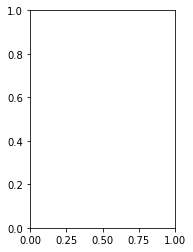

In [131]:
gdf2.plot("area", legend=True)

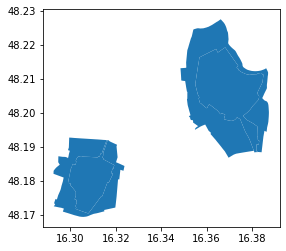

In [132]:
gdf2.plot()

In [134]:
gdf3=gpd.read_file('https://data.wien.gv.at/daten/geo?service=WFS&request=GetFeature&version=1.1.0&typeName=ogdwien:GENFLWIDMUNGOGD&srsName=EPSG:4326&outputFormat=json')
gdf3

,id,OBJECTID,WIDMUNGSKLASSE,WIDMUNGSKLASSE_TXT,BEZIRK,UMFANG,FLAECHE,SE_ANNO_CAD_DATA,geometry
0,GENFLWIDMUNGOGD.2697759,2697759,WO,Wohngebiet,22,751.4,19932.8,None,"POLYGON ((16.44846 48.24524, 16.44792 48.24534..."
1,GENFLWIDMUNGOGD.2697760,2697760,WO,Wohngebiet,22,785.8,13485.0,None,"POLYGON ((16.44741 48.24525, 16.44717 48.24529..."
2,GENFLWIDMUNGOGD.2697761,2697761,WO,Wohngebiet,22,1078.0,34784.9,None,"POLYGON ((16.44959 48.24706, 16.44956 48.24707..."
3,GENFLWIDMUNGOGD.2697758,2697758,WO,Wohngebiet,22,350.7,7665.7,None,"POLYGON ((16.45119 48.24468, 16.45073 48.24478..."
4,GENFLWIDMUNGOGD.2697762,2697762,WO,Wohngebiet,22,622.4,17518.7,None,"MULTIPOLYGON (((16.45154 48.24673, 16.45154 48..."
...,...,...,...,...,...,...,...,...,...
25471,GENFLWIDMUNGOGD.2696466,2696466,WO,Wohngebiet,23,481.0,8680.0,None,"POLYGON ((16.29718 48.13095, 16.29715 48.13095..."
25472,GENFLWIDMUNGOGD.2696467,2696467,WO,Wohngebiet,23,292.0,4250.3,None,"POLYGON ((16.28929 48.13330, 16.28911 48.13332..."
25473,GENFLWIDMUNGOGD.2696291,2696291,GBBG,Gemischtes Baugebiet-Betriebsbaugebiet,19,643.5,19724.8,None,"POLYGON ((16.36925 48.25105, 16.36930 48.25123..."
25474,GENFLWIDMUNGOGD.2696292,2696292,IG,Industriegebiet,23,727.1,30688.8,None,"POLYGON ((16.29769 48.13121, 16.29769 48.13121..."


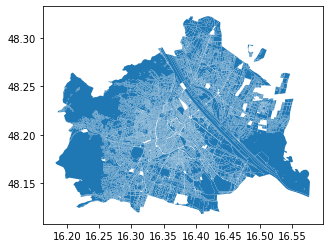

In [135]:
gdf3.plot()

Creating Pins with the geodata of the addresses (df['Adresse']) and defining the colours to different cathegories of builing types.